# Importing necessary libraries

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
titanic_data = pd.read_csv("/content/titanic.csv")
titanic_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
#Columns
titanic_data.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [5]:
titanic_data.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

# Checking for null values

In [6]:
titanic_data.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

We can see from the above output that the dataset has null values in "Age" column, "Cabin" column, and "Embarked" column.

# Fill the missing values

In [7]:
titanic_data["Age"].fillna(titanic_data["Age"].mean(), inplace = True)

In [8]:
titanic_data.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In this, we use mean as "Age" column has continuous data values.

In [9]:
titanic_data['Cabin'].fillna(titanic_data['Cabin'].mode()[0], inplace = True)

In [10]:
titanic_data.isna().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       2
dtype: int64

As the "Cabin" column has categorical data, we use mode to fill the missing values.

In [11]:
titanic_data['Embarked'].fillna(titanic_data['Embarked'].mode()[0], inplace = True)

In [12]:
titanic_data.isna().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
dtype: int64

As the "Embarked" column also has categorical data, we use mode to fill the missing values.

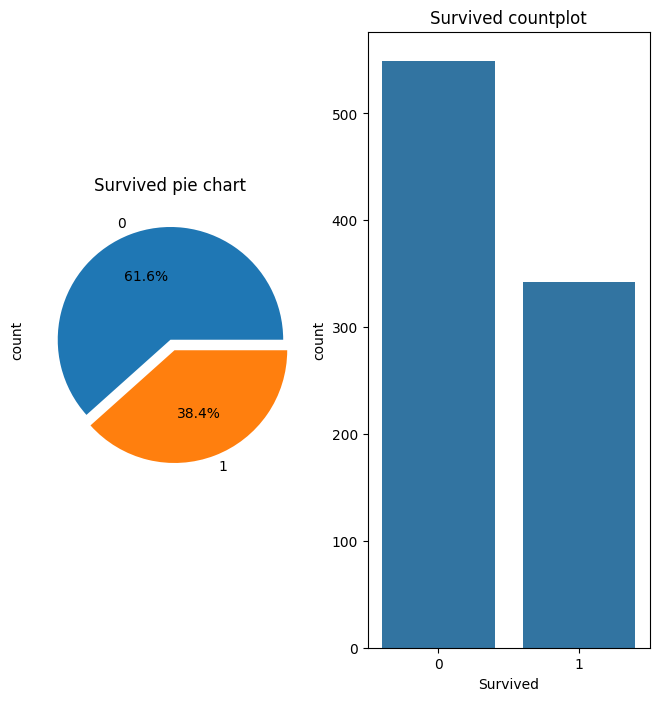

In [17]:
f, ax = plt.subplots(1,2,figsize=(8,8))
titanic_data['Survived'].value_counts().plot.pie(explode = [0,0.1], autopct = '%1.1f%%', ax = ax[0])
ax[0].set_title("Survived pie chart")
sns.countplot(x="Survived", data = titanic_data, ax = ax[1])
ax[1].set_title("Survived countplot")
plt.show()

It is clearly visible from the above graphs that the number of passengers survived is lesser than the passengers who did not survive. Number of people who died is more.

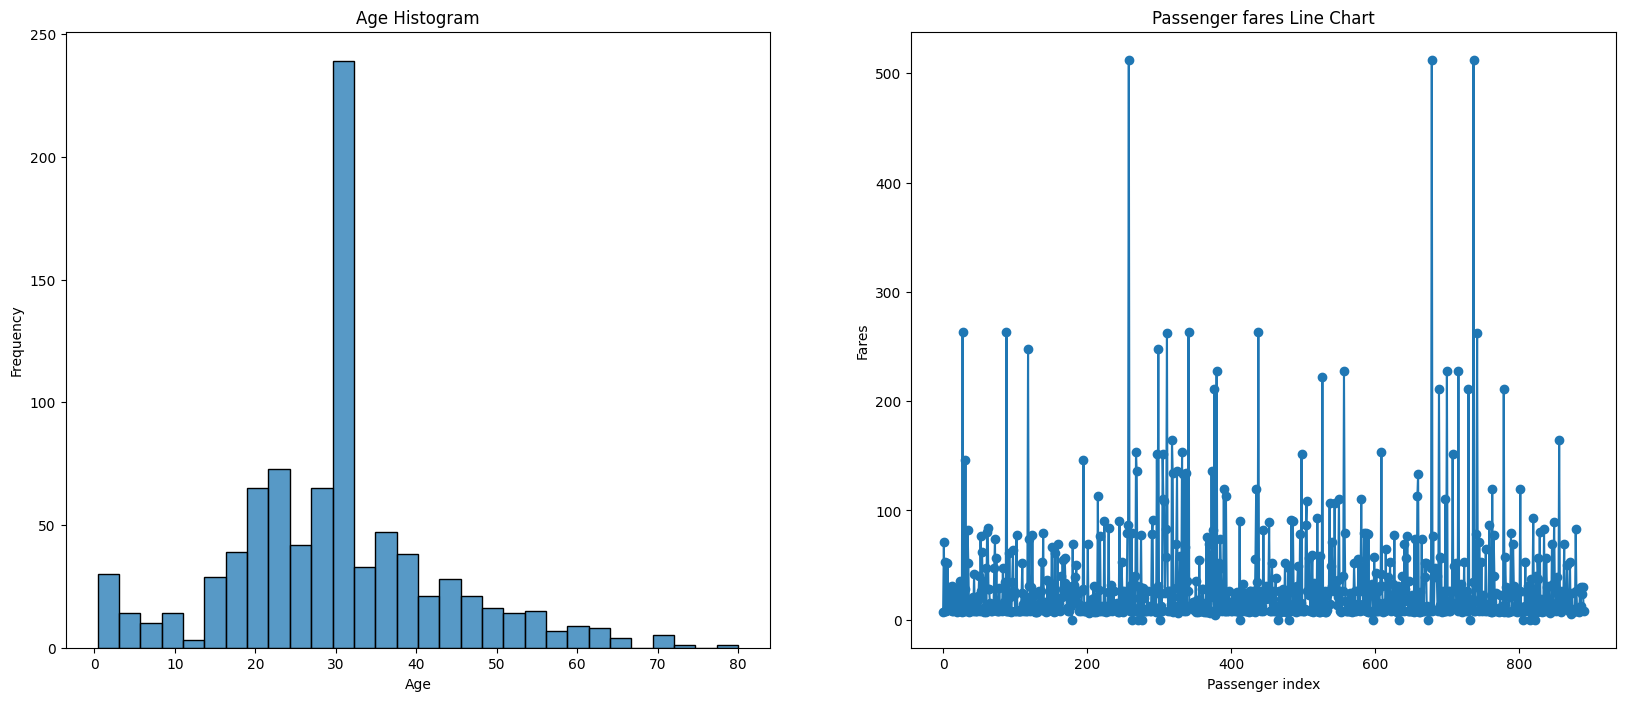

In [27]:
f, ax = plt.subplots(1, 2, figsize=(20, 8))
# Histogram of age
sns.histplot(titanic_data['Age'].dropna(), bins=30, kde=False, ax=ax[0])
ax[0].set_title("Age Histogram")
ax[0].set_xlabel('Age')
ax[0].set_ylabel('Frequency')

# Line chart of passenger age
ax[1].plot(titanic_data.index, titanic_data['Fare'], linestyle='-', marker='o')
ax[1].set_title("Passenger fares Line Chart")
ax[1].set_xlabel('Passenger index')
ax[1].set_ylabel('Fares')

plt.show()